In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [59]:
df = pd.read_csv('top_50_2023.csv')

In [61]:
df.describe()

,danceability,valence,energy,loudness,acousticness,instrumentalness,liveness,speechiness,key,tempo,mode,duration_ms,time_signature,popularity
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.00000,50.000000,50.000000
mean,0.662580,0.510740,0.659880,-6.012440,0.253332,0.020542,0.161280,0.083594,5.000000,124.069500,0.560000,200458.10000,3.900000,88.100000
std,0.123089,0.212346,0.121499,1.784443,0.222188,0.093655,0.091988,0.077913,3.522522,31.396557,0.501427,32580.81077,0.303046,5.690128
min,0.445000,0.131000,0.417000,-10.613000,0.001460,0.000000,0.023200,0.025600,0.000000,67.033000,0.000000,131013.00000,3.000000,72.000000
25%,0.559500,0.344000,0.556750,-7.126000,0.086275,0.000000,0.094675,0.038950,2.000000,97.963000,0.000000,176936.75000,4.000000,85.000000
50%,0.647500,0.507000,0.678000,-5.639000,0.164500,0.000012,0.121500,0.050950,5.000000,124.983500,1.000000,199740.00000,4.000000,89.000000
75%,0.776500,0.654500,0.736500,-4.877000,0.405500,0.000263,0.227000,0.081200,7.000000,138.059750,1.000000,228219.75000,4.000000,92.750000
max,0.911000,0.893000,0.965000,-2.810000,0.830000,0.634000,0.371000,0.333000,11.000000,203.759000,1.000000,272373.00000,4.000000,99.000000


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   artist_name         50 non-null     object 
 1   track_name          50 non-null     object 
 2   is_explicit         50 non-null     bool   
 3   album_release_date  50 non-null     object 
 4   genres              50 non-null     object 
 5   danceability        50 non-null     float64
 6   valence             50 non-null     float64
 7   energy              50 non-null     float64
 8   loudness            50 non-null     float64
 9   acousticness        50 non-null     float64
 10  instrumentalness    50 non-null     float64
 11  liveness            50 non-null     float64
 12  speechiness         50 non-null     float64
 13  key                 50 non-null     int64  
 14  tempo               50 non-null     float64
 15  mode                50 non-null     int64  
 16  duration_m

In [65]:
df.isnull().value_counts()

artist_name  track_name  is_explicit  album_release_date  genres  danceability  valence  energy  loudness  acousticness  instrumentalness  liveness  speechiness  key    tempo  mode   duration_ms  time_signature  popularity
False        False       False        False               False   False         False    False   False     False         False             False     False        False  False  False  False        False           False         50
Name: count, dtype: int64

In [68]:
df['duration_ms'] = df['duration_ms'].apply(lambda x: x / 60000)


In [70]:
df['duration_ms'] = df['duration_ms'].round(2)


In [73]:
df.rename(columns={'artist_name': 'artist', 'album_release_date': 'release_date', 'duration_ms': 'duration_mins'}, inplace=True)


In [77]:
df['artist'] = df['artist'].str.strip()
df


,artist,track_name,is_explicit,release_date,genres,danceability,valence,energy,loudness,acousticness,instrumentalness,liveness,speechiness,key,tempo,mode,duration_mins,time_signature,popularity
0,Miley Cyrus,Flowers,False,2023-08-18,['pop'],0.706,0.632,0.691,-4.775,0.05840,0.000070,0.0232,0.0633,0,118.048,1,3.34,4,94
1,SZA,Kill Bill,False,2022-12-08,"['pop', 'r&b', 'rap']",0.644,0.418,0.735,-5.747,0.05210,0.144000,0.1610,0.0391,8,88.980,1,2.57,4,86
2,Harry Styles,As It Was,False,2022-05-20,['pop'],0.520,0.662,0.731,-5.338,0.34200,0.001010,0.3110,0.0557,6,173.930,0,2.79,4,95
3,Jung Kook,Seven (feat. Latto) (Explicit Ver.),True,2023-11-03,['k-pop'],0.790,0.872,0.831,-4.185,0.31200,0.000000,0.0797,0.0440,11,124.987,1,3.06,4,90
4,Eslabon Armado,Ella Baila Sola,False,2023-04-28,"['corrido', 'corridos tumbados', 'sad sierreno...",0.668,0.834,0.758,-5.176,0.48300,0.000019,0.0837,0.0332,5,147.989,0,2.76,3,86
5,Taylor Swift,Cruel Summer,False,2019-08-23,['pop'],0.552,0.564,0.702,-5.707,0.11700,0.000021,0.1050,0.1570,9,169.994,1,2.97,4,99
6,Metro Boomin,Creepin' (with The Weeknd & 21 Savage),True,2022-12-02,['rap'],0.715,0.172,0.620,-6.005,0.41700,0.000000,0.0822,0.0484,1,97.950,0,3.69,4,91
7,Rema,Calm Down (with Selena Gomez),False,2023-04-27,"['afrobeats', 'nigerian pop']",0.799,0.811,0.802,-5.196,0.42900,0.001280,0.1710,0.0371,11,107.008,1,3.99,4,90
8,Bizarrap,"Shakira: Bzrp Music Sessions, Vol. 53",False,2023-01-11,"['argentine hip hop', 'pop venezolano', 'trap ...",0.778,0.498,0.632,-5.600,0.27400,0.000000,0.0915,0.0493,2,122.104,0,3.64,4,85
9,Taylor Swift,Anti-Hero,False,2022-10-21,['pop'],0.637,0.533,0.643,-6.571,0.13000,0.000002,0.1420,0.0519,4,97.008,1,3.34,4,92


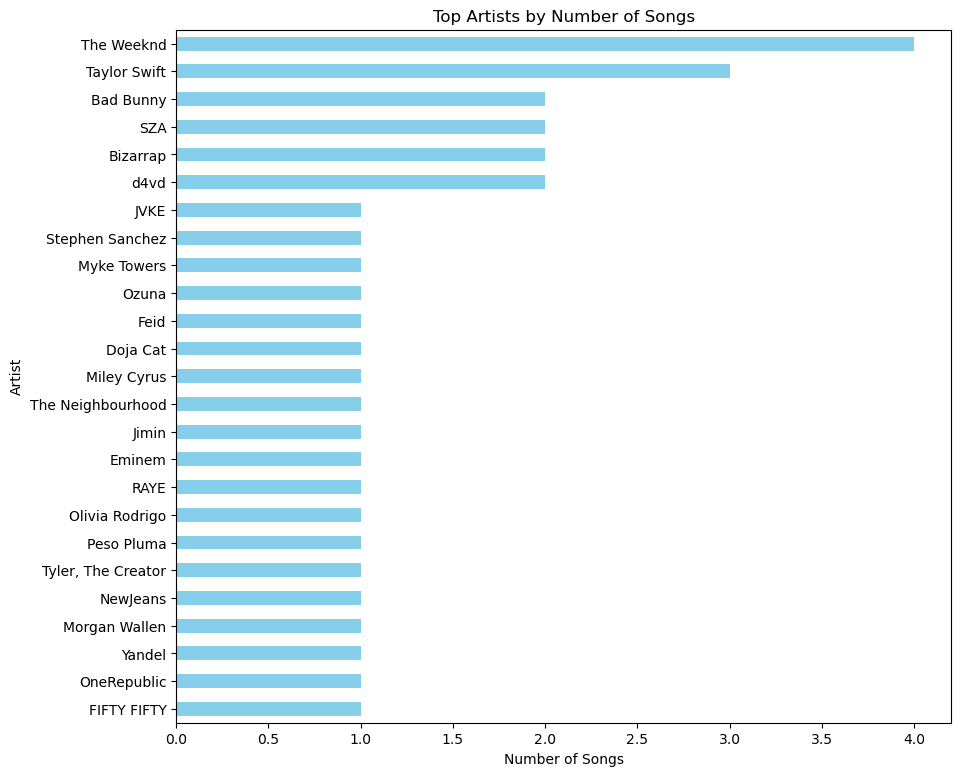

In [23]:
artist_counts = df['artist'].value_counts()
top_n_artists = artist_counts.head(25)  
top_n_artists = top_n_artists.iloc[::-1]
plt.figure(figsize=(10, 9))
top_n_artists.plot(kind='barh', color='skyblue')
plt.title('Top Artists by Number of Songs')
plt.xlabel('Number of Songs')
plt.ylabel('Artist')
plt.show()

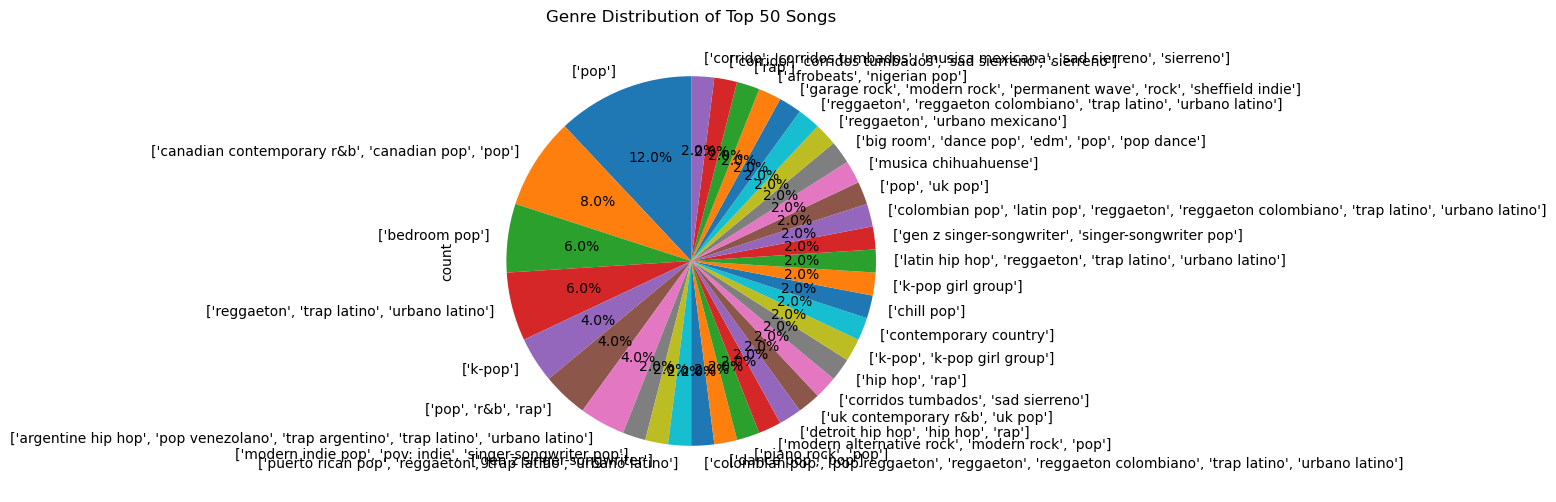

In [35]:
plt.figure(figsize=(10, 6))
df['genres'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Genre Distribution of Top 50 Songs')
plt.show()

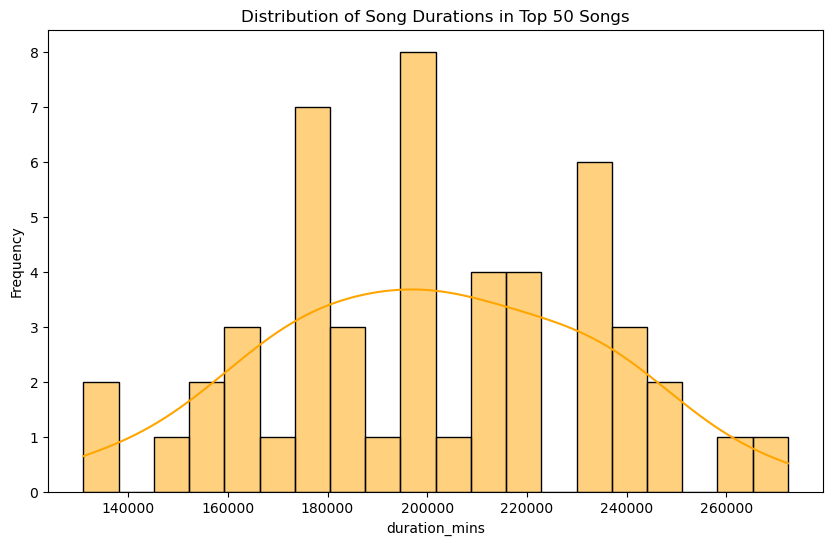

In [53]:
plt.figure(figsize=(10, 6))
sns.histplot(df['duration_mins'], bins=20, kde=True, color='orange')
plt.title('Distribution of Song Durations in Top 50 Songs')
plt.xlabel('duration_mins')
plt.ylabel('Frequency')
plt.show()

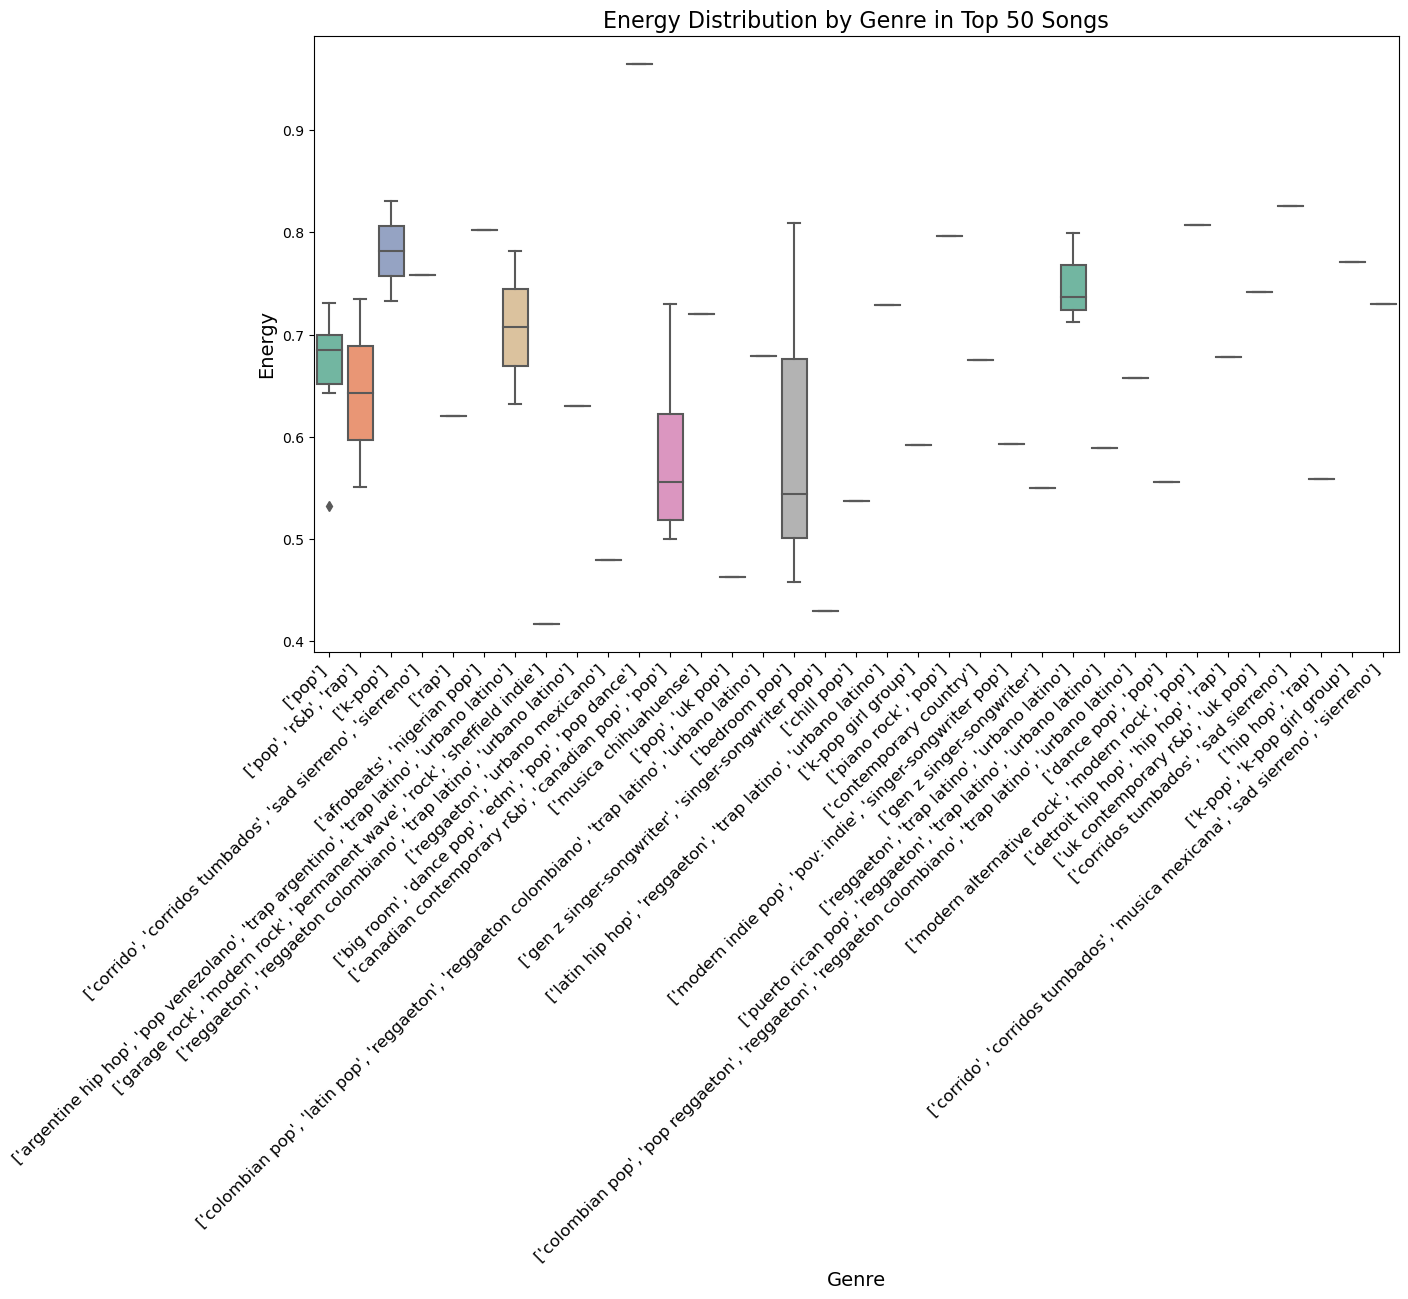

In [103]:
plt.figure(figsize=(14, 8))
sns.boxplot(x='genres', y='energy', data=df, palette='Set2')
plt.title('Energy Distribution by Genre in Top 50 Songs', fontsize=16) 
plt.xlabel('Genre', fontsize=14) 
plt.ylabel('Energy', fontsize=14) 
plt.xticks(rotation=45, ha='right', fontsize=12)  
plt.show()

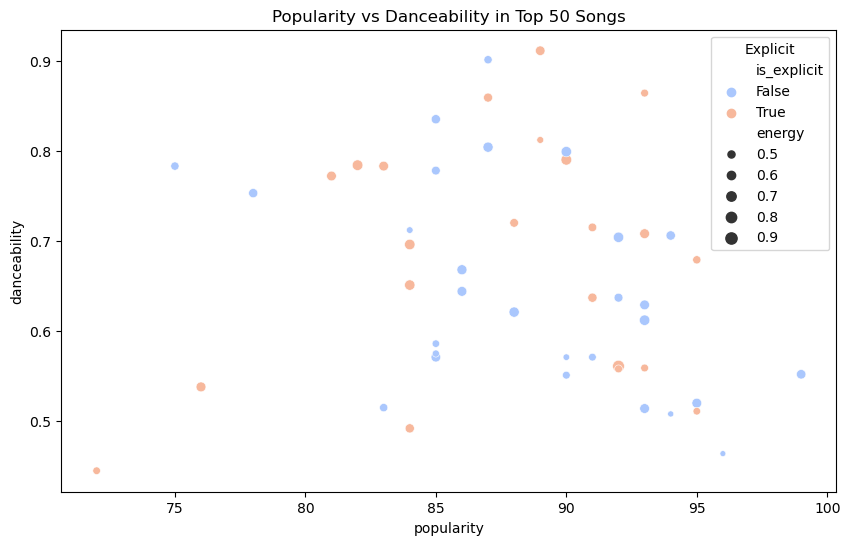

In [91]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='popularity', y='danceability', data=df, hue='is_explicit', palette='coolwarm', size='energy')
plt.title('Popularity vs Danceability in Top 50 Songs')
plt.xlabel('popularity')
plt.ylabel('danceability')
plt.legend(title='Explicit')
plt.show()

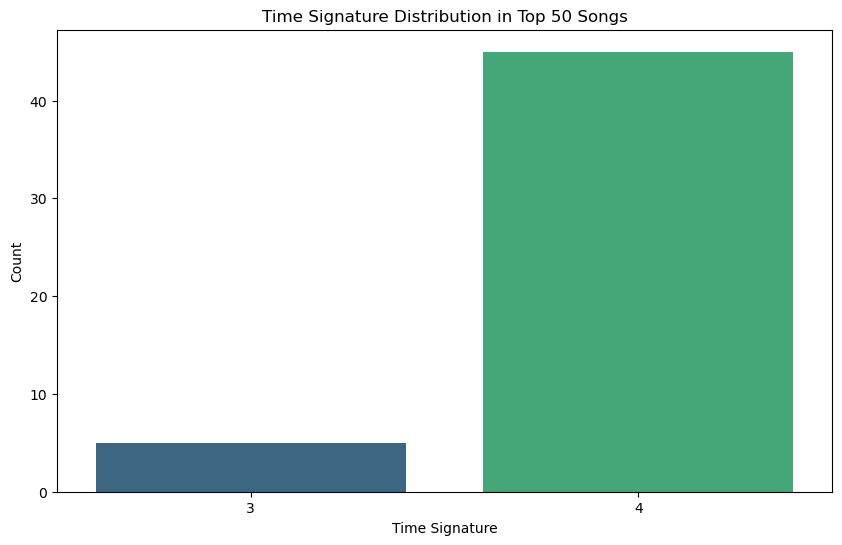

In [93]:
plt.figure(figsize=(10, 6))
sns.countplot(x='time_signature', data=df, palette='viridis')
plt.title('Time Signature Distribution in Top 50 Songs')
plt.xlabel('Time Signature')
plt.ylabel('Count')
plt.show()